# Todos

1. Get a set of predictions for an audio file
2. Build a tool that visually annotates predictions to audio
3. Get the predictions working correctly

In [1]:
def installDeps():
    !pip install numpy scipy
    !pip install resampy tensorflow six
    !pip install youtube_dl
    !pip install ipywidgets
    !pip install pydub
    !pip install tqdm
    !pip install ffmpeg-python
    !apt-get install ffmpeg
#!python vggish_train_demo.py --num_batches 50 --train_vggish=False --checkpoint './vggish_model.ckpt'

from __future__ import print_function

from random import shuffle

import numpy as np
import tensorflow as tf
import os
import vggish_input
import vggish_params
import vggish_slim
from pydub import AudioSegment
from audioModel import predict, train
from audioInput import getLaughTracks, getNoise, processWavFile
import IPython.display as ipd
from audioDisplay import displayAudioWithPredictions, displayWaveform
import random
from audioUtils import downloadYtAndPrepareAudio

slim = tf.contrib.slim
model_name = 'model_950_100'

In [2]:
def predictAudio(path):
    preds = predict(model_name, 2, processWavFile(path, log=False))
    displayWaveform(path)
    displayAudioWithPredictions(path, preds)    
    
def download(id):
    downloadYtAndPrepareAudio(id, 'data', stripSilence=False)

INFO:tensorflow:Restoring parameters from ./vggish_model.ckpt
INFO:tensorflow:Restoring parameters from ./model/model_950_100


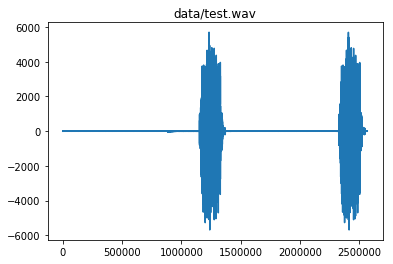

0.0,0.48,0.96,1.44,1.92,2.4,2.88,3.36,3.84,4.32,4.8,5.28,5.76,6.24,6.72,7.2,7.68,8.16,8.64,9.12,9.6,10.08,10.56,11.04,11.52,12.0,12.48,12.96,13.44,13.92,14.4,14.88,15.36,15.84,16.32,16.8,17.28,17.76,18.24,18.72,19.2,19.68,20.16,20.64,21.12,21.6,22.08,22.56,23.04,23.52,24.0,24.48,24.96,25.44,25.92,26.4,26.88,27.36,27.84,28.32
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0


In [3]:
predictAudio('data/test.wav')

INFO:tensorflow:Restoring parameters from ./vggish_model.ckpt
INFO:tensorflow:Restoring parameters from ./model/model_950_100


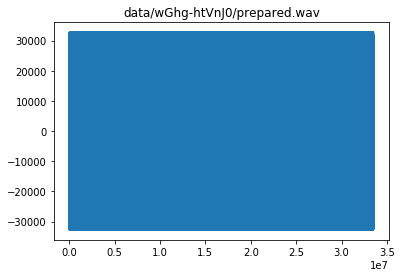

0.0,0.48,0.96,1.44,1.92,2.4,2.88,3.36,3.84,4.32,4.8,5.28,5.76,6.24,6.72,7.2,7.68,8.16,8.64,9.12,9.6,10.08,10.56,11.04,11.52,12.0,12.48,12.96,13.44,13.92,14.4,14.88,15.36,15.84,16.32,16.8,17.28,17.76,18.24,18.72,19.2,19.68,20.16,20.64,21.12,21.6,22.08,22.56,23.04,23.52,24.0,24.48,24.96,25.44,25.92,26.4,26.88,27.36,27.84,28.32,28.8,29.28,29.76,30.24,30.72,31.2,31.68,32.16,32.64,33.12,33.6,34.08,34.56,35.04,35.52,36.0,36.48,36.96,37.44,37.92,38.4,38.88,39.36,39.84,40.32,40.8,41.28,41.76,42.24,42.72,43.2,43.68,44.16,44.64,45.12,45.6,46.08,46.56,47.04,47.52,48.0,48.48,48.96,49.44,49.92,50.4,50.88,51.36,51.84,52.32,52.8,53.28,53.76,54.24,54.72,55.2,55.68,56.16,56.64,57.12,57.6,58.08,58.56,59.04,59.52,60.0,60.48,60.96,61.44,61.92,62.4,62.88,63.36,63.84,64.32,64.8,65.28,65.76,66.24,66.72,67.2,67.68,68.16,68.64,69.12,69.6,70.08,70.56,71.04,71.52,72.0,72.48,72.96,73.44,73.92,74.4,74.88,75.36,75.84,76.32,76.8,77.28,77.76,78.24,78.72,79.2,79.68,80.16,80.64,81.12,81.6,82.08,82.56,83.04,83.52,84.0,84.48,84.96,85.44,85.92,86.4,86.88,87.36,87.84,88.32,88.8,89.28,89.76,90.24,90.72,91.2,91.68,92.16,92.64,93.12,93.6,94.08,94.56,95.04,95.52,96.0,96.48,96.96,97.44,97.92,98.4,98.88,99.36,99.84,100.32,100.8,101.28,101.76,102.24,102.72,103.2,103.68,104.16,104.64,105.12,105.6,106.08,106.56,107.04,107.52,108.0,108.48,108.96,109.44,109.92,110.4,110.88,111.36,111.84,112.32,112.8,113.28,113.76,114.24,114.72,115.2,115.68,116.16,116.64,117.12,117.6,118.08,118.56,119.04,119.52,120.0,120.48,120.96,121.44,121.92,122.4,122.88,123.36,123.84,124.32,124.8,125.28,125.76,126.24,126.72,127.2,127.68,128.16,128.64,129.12,129.6,130.08,130.56,131.04,131.52,132.0,132.48,132.96,133.44,133.92,134.4,134.88,135.36,135.84,136.32,136.8,137.28,137.76,138.24,138.72,139.2,139.68,140.16,140.64,141.12,141.6,142.08,142.56,143.04,143.52,144.0,144.48,144.96,145.44,145.92,146.4,146.88,147.36,147.84,148.32,148.8,149.28,149.76,150.24,150.72,151.2,151.68,152.16,152.64,153.12,153.6,154.08,154.56,155.04,155.52,156.0,156.48,156.96,157.44,157.92,158.4,158.88,159.36,159.84,160.32,160.8,161.28,161.76,162.24,162.72,163.2,163.68,164.16,164.64,165.12,165.6,166.08,166.56,167.04,167.52,168.0,168.48,168.96,169.44,169.92,170.4,170.88,171.36,171.84,172.32,172.8,173.28,173.76,174.24,174.72,175.2,175.68,176.16,176.64,177.12,177.6,178.08,178.56,179.04,179.52,180.0,180.48,180.96,181.44,181.92,182.4,182.88,183.36,183.84,184.32,184.8,185.28,185.76,186.24,186.72,187.2,187.68,188.16,188.64,189.12
0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0


In [4]:
#download('wGhg-htVnJ0')
predictAudio('data/wGhg-htVnJ0/prepared.wav')